In [2]:
import numpy as np # linear algebra
import sklearn

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [3]:
file_path = "Absolute_Genshin_DB.csv"
df = pd.read_csv(file_path)

In [4]:
df.columns

Index(['charName', 'Gender', 'Element', 'Weapon', 'Region', 'f_val', 'm_val',
       'k_val', 'sum'],
      dtype='object')

In [5]:
df.dtypes

charName    object
Gender      object
Element     object
Weapon      object
Region      object
f_val        int64
m_val        int64
k_val        int64
sum          int64
dtype: object

In [6]:
df.head()

,charName,Gender,Element,Weapon,Region,f_val,m_val,k_val,sum
0,Shikanoin Heizou,Male,Anemo,Catalyst,Inazuma,0,1,0,1
1,Albedo,Male,Geo,Sword,Mondstadt,3,6,11,20
2,Amber,Female,Pyro,Bow,Mondstadt,1,7,5,13
3,Arataki Itto,Male,Geo,Claymore,Inazuma,8,11,1,20
4,Beidou,Female,Electro,Claymore,Liyue,16,10,1,27


<AxesSubplot:>

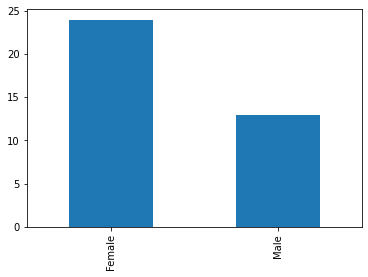

In [7]:
df['Gender'].value_counts().plot.bar()

<AxesSubplot:>

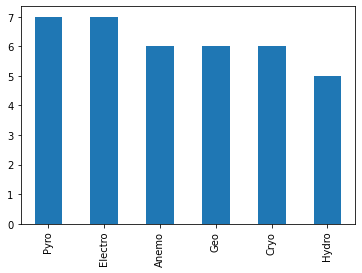

In [8]:
df['Element'].value_counts().plot.bar()

<AxesSubplot:>

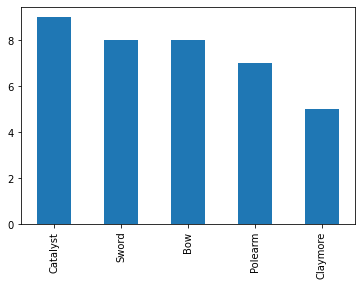

In [9]:
df['Weapon'].value_counts().plot.bar()

<AxesSubplot:>

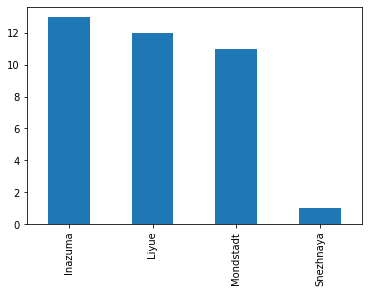

In [10]:
df['Region'].value_counts().plot.bar()

<AxesSubplot:ylabel='Gender'>

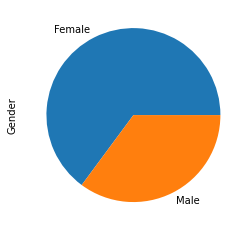

In [11]:
df['Gender'].value_counts(normalize=True).plot.pie()

<AxesSubplot:ylabel='Element'>

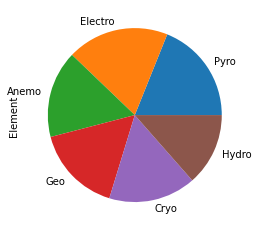

In [12]:
df['Element'].value_counts(normalize=True).plot.pie()

<AxesSubplot:ylabel='Weapon'>

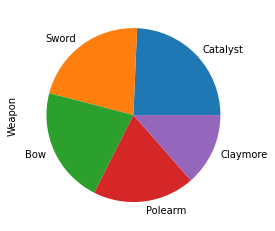

In [13]:
df['Weapon'].value_counts(normalize=True).plot.pie()

<AxesSubplot:ylabel='Region'>

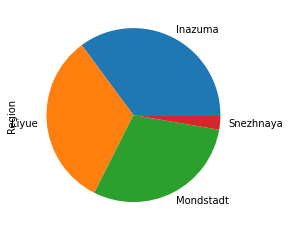

In [14]:
df['Region'].value_counts(normalize=True).plot.pie()

23.027027027027028


<AxesSubplot:ylabel='sum'>

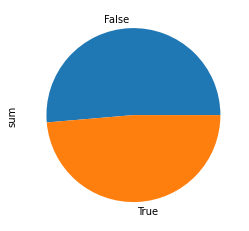

In [15]:
average = df['sum'].mean()
print(average)

filt = (df['sum'] >= average)
filt.value_counts().plot.pie()


In [16]:
df['f_avg'] = df['f_val'] / average
df['m_avg'] = df['m_val'] / average
df['k_avg'] = df['k_val'] / average

In [17]:
print(df.head())

            charName  Gender  Element    Weapon     Region  f_val  m_val  \
0  Shikanoin Heizou     Male    Anemo  Catalyst    Inazuma      0      1   
1             Albedo    Male      Geo     Sword  Mondstadt      3      6   
2              Amber  Female     Pyro       Bow  Mondstadt      1      7   
3       Arataki Itto    Male      Geo  Claymore    Inazuma      8     11   
4             Beidou  Female  Electro  Claymore      Liyue     16     10   

   k_val  sum     f_avg     m_avg     k_avg  
0      0    1  0.000000  0.043427  0.000000  
1     11   20  0.130282  0.260563  0.477700  
2      5   13  0.043427  0.303991  0.217136  
3      1   20  0.347418  0.477700  0.043427  
4      1   27  0.694836  0.434272  0.043427  


<AxesSubplot:xlabel='f_avg', ylabel='Count'>

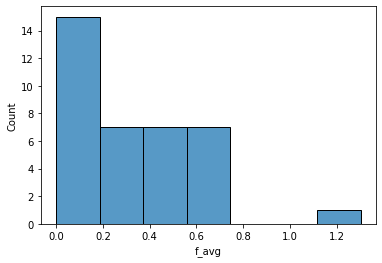

In [18]:
sns.histplot(df['f_avg'])

<AxesSubplot:xlabel='m_avg', ylabel='Count'>

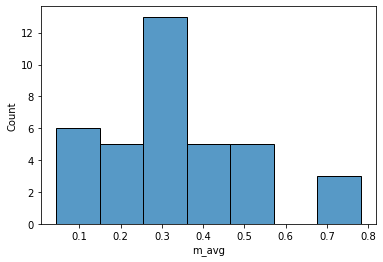

In [19]:
sns.histplot(df['m_avg'])

<AxesSubplot:xlabel='k_avg', ylabel='Count'>

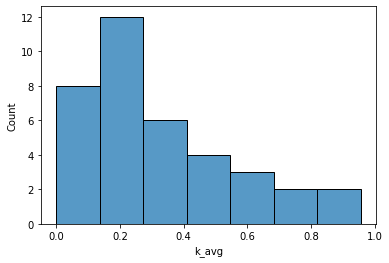

In [20]:
sns.histplot(df['k_avg'])

In [21]:
#describe the shape and distribution of the scores
#skewness and kurtosis
print("Skewness: %f" % df['f_avg'].skew())
print("Kurtosis: %f" % df['f_avg'].kurt())

Skewness: 1.256135
Kurtosis: 2.780699


In [22]:
#describe the shape and distribution of the scores
#skewness and kurtosis
print("Skewness: %f" % df['m_avg'].skew())
print("Kurtosis: %f" % df['m_avg'].kurt())

Skewness: 0.788960
Kurtosis: 0.640920


In [23]:
#describe the shape and distribution of the scores
#skewness and kurtosis
print("Skewness: %f" % df['k_avg'].skew())
print("Kurtosis: %f" % df['k_avg'].kurt())

Skewness: 1.094712
Kurtosis: 0.769328


Analysis of Characters for Max and Min F score

In [24]:
print("The lowest fuckability score was", df['f_avg'].min())
print("The highest fuckability score was", df['f_avg'].max())

The lowest fuckability score was 0.0
The highest fuckability score was 1.3028169014084507


In [25]:
#create filters
lowest = (df['f_avg'] == df['f_avg'].min())
highest = (df['f_avg'] == df['f_avg'].max())

In [26]:
print("The Character with the lowest fuckability score is \n",df.loc[df['f_avg'] == df['f_avg'].min(), 'charName'])
print("The Character with the highest fuckability is \n", df.loc[df['f_avg'] == df['f_avg'].max(), 'charName'])

The Character with the lowest fuckability score is 
 0     Shikanoin Heizou 
25              Sucrose
27                Venti
Name: charName, dtype: object
The Character with the highest fuckability is 
 19    Mona
Name: charName, dtype: object


In [27]:
df.sort_values(by=['f_avg'], ascending = False, inplace = True)
df[['f_avg', 'charName','Gender', 'Element','Weapon','Region']].head(5)

,f_avg,charName,Gender,Element,Weapon,Region
19,1.302817,Mona,Female,Hydro,Catalyst,Mondstadt
4,0.694836,Beidou,Female,Electro,Claymore,Liyue
28,0.694836,Yae Miko,Female,Electro,Catalyst,Inazuma
34,0.694836,Yelan,Female,Hydro,Bow,Liyue
21,0.694836,Raiden Shogun,Female,Electro,Polearm,Inazuma


In [28]:
df.sort_values(by=['f_avg'], ascending = True, inplace = True)
df[['f_avg', 'charName','Gender', 'Element','Weapon','Region']].head(5)

,f_avg,charName,Gender,Element,Weapon,Region
0,0.000000,Shikanoin Heizou,Male,Anemo,Catalyst,Inazuma
25,0.000000,Sucrose,Female,Anemo,Catalyst,Mondstadt
27,0.000000,Venti,Male,Anemo,Bow,Mondstadt
2,0.043427,Amber,Female,Pyro,Bow,Mondstadt
33,0.043427,Xiao,Male,Anemo,Polearm,Liyue


<AxesSubplot:ylabel='f_avg'>

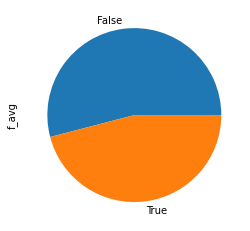

In [29]:

filt = (df['f_avg'] >= df['f_avg'].mean())
filt.value_counts().plot.pie()


Analysis of Characters for Marriage Scores

In [30]:
print("The lowest marriage score was", df['m_avg'].min())
print("The highest marriage score was", df['m_avg'].max())

The lowest marriage score was 0.04342723004694835
The highest marriage score was 0.7816901408450704


In [31]:
print("The Character with the lowest marriagability score is \n",df.loc[df['m_avg'] == df['m_avg'].min(), 'charName'])
print("The Character with the marriagability score is \n", df.loc[df['m_avg'] == df['m_avg'].max(), 'charName'])

The Character with the lowest marriagability score is 
 0     Shikanoin Heizou 
33                 Xiao
Name: charName, dtype: object
The Character with the marriagability score is 
 26      Thoma
16     Keqing
30    Yoimiya
Name: charName, dtype: object


In [32]:
df.sort_values(by=['m_avg'], ascending = False, inplace = True)
df[['m_avg', 'charName','Gender', 'Element','Weapon','Region']].head(5)

,m_avg,charName,Gender,Element,Weapon,Region
30,0.781690,Yoimiya,Female,Pyro,Bow,Inazuma
26,0.781690,Thoma,Male,Pyro,Polearm,Inazuma
16,0.781690,Keqing,Female,Electro,Sword,Liyue
35,0.521127,Kuki Shinobu,Female,Electro,Sword,Inazuma
31,0.521127,Yun Jin,Female,Geo,Polearm,Liyue


In [33]:
df.sort_values(by=['m_avg'], ascending = True, inplace = True)
df[['m_avg', 'charName','Gender', 'Element','Weapon','Region']].head(5)

,m_avg,charName,Gender,Element,Weapon,Region
0,0.043427,Shikanoin Heizou,Male,Anemo,Catalyst,Inazuma
33,0.043427,Xiao,Male,Anemo,Polearm,Liyue
5,0.086854,Childe,Male,Hydro,Bow,Snezhnaya
17,0.086854,Kujou Sara,Female,Electro,Bow,Inazuma
21,0.130282,Raiden Shogun,Female,Electro,Polearm,Inazuma


<AxesSubplot:ylabel='m_avg'>

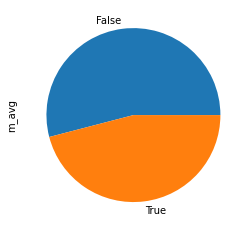

In [34]:
filt = (df['m_avg'] >= df['m_avg'].mean())
filt.value_counts().plot.pie()

Analysis of Characters for Kill Scores

In [35]:
print("The lowest marriage score was", df['k_avg'].min())
print("The highest marriage score was", df['k_avg'].max())

The lowest marriage score was 0.0
The highest marriage score was 0.9553990610328638


In [36]:
print("The Character with the lowest killability score is \n",df.loc[df['k_avg'] == df['k_avg'].min(), 'charName'])
print("The Character with the killability score is \n", df.loc[df['k_avg'] == df['k_avg'].max(), 'charName'])

The Character with the lowest killability score is 
 0    Shikanoin Heizou 
Name: charName, dtype: object
The Character with the killability score is 
 33      Xiao
5     Childe
Name: charName, dtype: object


In [37]:
df.sort_values(by=['k_avg'], ascending = False, inplace = True)
df[['k_avg', 'charName','Gender', 'Element','Weapon','Region']].head(5)

,k_avg,charName,Gender,Element,Weapon,Region
33,0.955399,Xiao,Male,Anemo,Polearm,Liyue
5,0.955399,Childe,Male,Hydro,Bow,Snezhnaya
32,0.738263,Zhongli,Male,Geo,Polearm,Liyue
12,0.694836,Kaedehara Kazuha,Male,Anemo,Sword,Inazuma
24,0.607981,Shenhe,Female,Cryo,Polearm,Liyue


In [38]:
df.sort_values(by=['k_avg'], ascending = True, inplace = True)
df[['k_avg', 'charName','Gender', 'Element','Weapon','Region']].head(5)

,k_avg,charName,Gender,Element,Weapon,Region
0,0.000000,Shikanoin Heizou,Male,Anemo,Catalyst,Inazuma
3,0.043427,Arataki Itto,Male,Geo,Claymore,Inazuma
19,0.043427,Mona,Female,Hydro,Catalyst,Mondstadt
4,0.043427,Beidou,Female,Electro,Claymore,Liyue
34,0.086854,Yelan,Female,Hydro,Bow,Liyue


<AxesSubplot:ylabel='k_avg'>

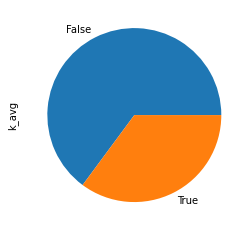

In [39]:
filt = (df['k_avg'] >= df['k_avg'].mean())
filt.value_counts().plot.pie()

Correlation

In [40]:
df_scores = df.drop(columns=['f_val','m_val','k_val', 'charName', 'sum'])
df_scores.head()
df_scores_corr =  df_scores.copy()

In [41]:
non_int_columns = ["Gender", "Element", "Weapon", "Region"]
enc = LabelEncoder()

raw_list = []
legend = {}
for column in non_int_columns:
    legend[column] = df_scores_corr[column].unique()
    for item in df_scores_corr[column].unique():
        raw_list.append(item)
    enc.fit(df_scores_corr[column].unique())
    df_scores_corr[column] = enc.transform(df_scores_corr[column])

df_scores_corr.head()


,Gender,Element,Weapon,Region,f_avg,m_avg,k_avg
0,1,0,1,0,0.000000,0.043427,0.000000
3,1,3,2,0,0.347418,0.477700,0.043427
19,0,4,1,2,1.302817,0.347418,0.043427
4,0,2,2,1,0.694836,0.434272,0.043427
34,0,4,0,1,0.694836,0.303991,0.086854


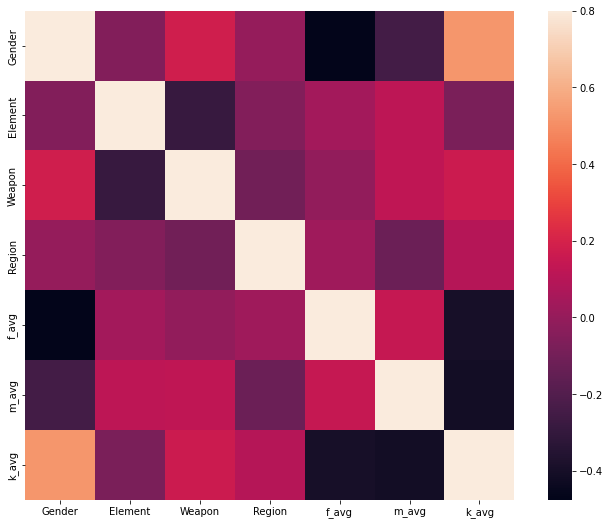

In [42]:


#correlation matrix
corrmat = df_scores_corr.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);



In [43]:
print(df_scores.head())

    Gender  Element    Weapon     Region     f_avg     m_avg     k_avg
0     Male    Anemo  Catalyst    Inazuma  0.000000  0.043427  0.000000
3     Male      Geo  Claymore    Inazuma  0.347418  0.477700  0.043427
19  Female    Hydro  Catalyst  Mondstadt  1.302817  0.347418  0.043427
4   Female  Electro  Claymore      Liyue  0.694836  0.434272  0.043427
34  Female    Hydro       Bow      Liyue  0.694836  0.303991  0.086854


How does Gender rank in each category?

In [44]:
df_scores.groupby('Gender').f_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Gender,,,,
Female,0.439701,0.412559,1.302817,0.0
Male,0.173709,0.130282,0.521127,0.0


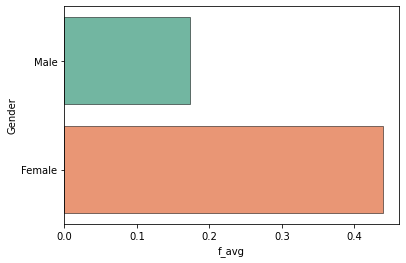

In [45]:
#plot percent tested against borough using seaborn
sns.barplot(x="f_avg", y="Gender", 
            data=df_scores, orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Gender').f_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [46]:
df_scores.groupby('Gender').m_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Gender,,,,
Female,0.369131,0.347418,0.78169,0.086854
Male,0.270585,0.260563,0.78169,0.043427


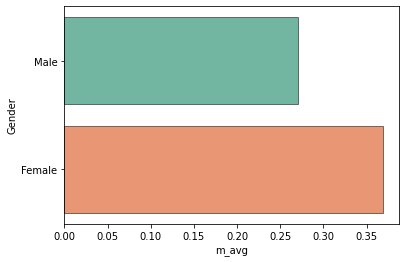

In [47]:
#plot percent tested against borough using seaborn
sns.barplot(x="m_avg", y="Gender", 
            data=df_scores, orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Gender').m_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [48]:
df_scores.groupby('Gender').k_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Gender,,,,
Female,0.226183,0.217136,0.607981,0.043427
Male,0.491062,0.521127,0.955399,0.000000


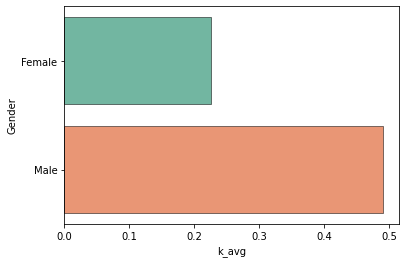

In [49]:
#plot percent tested against borough using seaborn
sns.barplot(x="k_avg", y="Gender", 
            data=df_scores, orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Gender').k_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [50]:
#Review
gender_f = list(df_scores.groupby('Gender').f_avg.agg(['mean']).sort_values('mean',ascending=False).index)
gender_m = list(df_scores.groupby('Gender').m_avg.agg(['mean']).sort_values('mean',ascending=False).index)
gender_k = list(df_scores.groupby('Gender').k_avg.agg(['mean']).sort_values('mean',ascending=False).index)

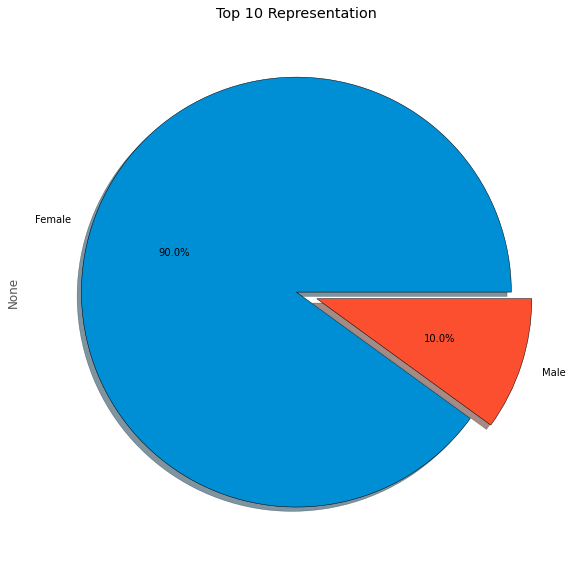

In [51]:
top10 = df_scores.sort_values('f_avg',ascending=False).head(10).value_counts('Gender')
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if top10[element] == top10.min() else 0 for element in top10.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f']

top10.plot.pie(y = top10.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Top 10 Representation")
plt.tight_layout()
plt.show()

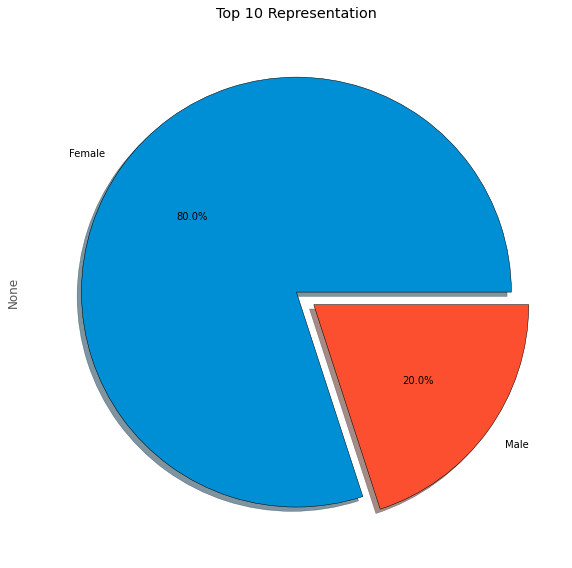

In [52]:
top10 = df_scores.sort_values('m_avg',ascending=False).head(10).value_counts('Gender')
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if top10[element] == top10.min() else 0 for element in top10.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f']

top10.plot.pie(y = top10.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Top 10 Representation")
plt.tight_layout()
plt.show()

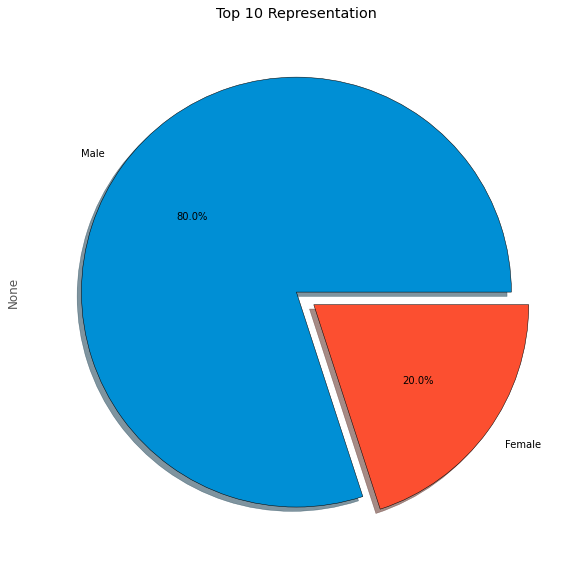

In [53]:
top10 = df_scores.sort_values('k_avg',ascending=False).head(10).value_counts('Gender')
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if top10[element] == top10.min() else 0 for element in top10.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f']

top10.plot.pie(y = top10.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Top 10 Representation")
plt.tight_layout()
plt.show()

Which Elements ranked highest in each category?

In [54]:
df_scores.groupby('Element').f_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Element,,,,
Anemo,0.123044,0.021714,0.521127,0.000000
Cryo,0.412559,0.390845,0.607981,0.260563
Electro,0.570758,0.564554,0.694836,0.347418
Geo,0.238850,0.173709,0.477700,0.130282
Hydro,0.547183,0.303991,1.302817,0.173709
Pyro,0.204728,0.130282,0.521127,0.043427


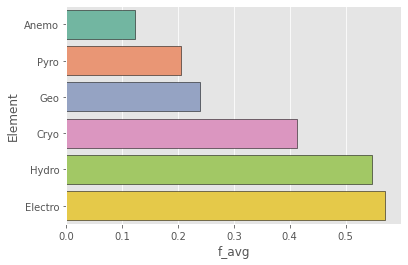

In [55]:
#plot percent tested against borough using seaborn
sns.barplot(x="f_avg", y="Element", 
            data=df_scores, orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Element').f_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [56]:
df_scores.groupby('Element').m_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Element,,,,
Anemo,0.260563,0.303991,0.521127,0.043427
Cryo,0.347418,0.347418,0.521127,0.173709
Electro,0.378437,0.390845,0.781690,0.086854
Geo,0.332942,0.303991,0.521127,0.173709
Hydro,0.251878,0.303991,0.347418,0.086854
Pyro,0.403253,0.303991,0.781690,0.130282


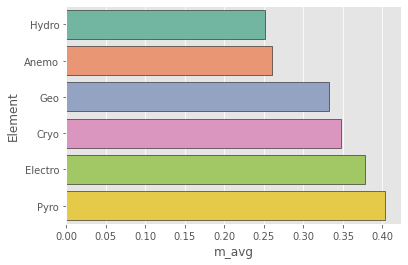

In [57]:
#plot percent tested against borough using seaborn
sns.barplot(x="m_avg", y="Element", 
            data=df_scores.sort_values('m_avg'), orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Element').m_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [58]:
df_scores.groupby('Element').k_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Element,,,,
Anemo,0.434272,0.390845,0.955399,0.000000
Cryo,0.282277,0.195423,0.607981,0.086854
Electro,0.210932,0.217136,0.347418,0.043427
Geo,0.369131,0.347418,0.738263,0.043427
Hydro,0.390845,0.303991,0.955399,0.043427
Pyro,0.266767,0.260563,0.434272,0.086854


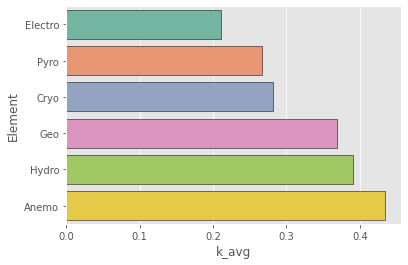

In [59]:
#plot percent tested against borough using seaborn
sns.barplot(x="k_avg", y="Element", 
            data=df_scores.sort_values('m_avg'), orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Element').k_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [60]:
#Review
element_f = list(df_scores.groupby('Element').f_avg.agg(['mean']).sort_values('mean',ascending=False).index)
element_m = list(df_scores.groupby('Element').m_avg.agg(['mean']).sort_values('mean',ascending=False).index)
element_k = list(df_scores.groupby('Element').k_avg.agg(['mean']).sort_values('mean',ascending=False).index)

In [61]:
print("Most Fuckable:")
for index, element in enumerate(element_f):
    print(" ", str(index+1) + ".", element)

Most Fuckable:
  1. Electro
  2. Hydro
  3. Cryo
  4. Geo
  5. Pyro
  6. Anemo


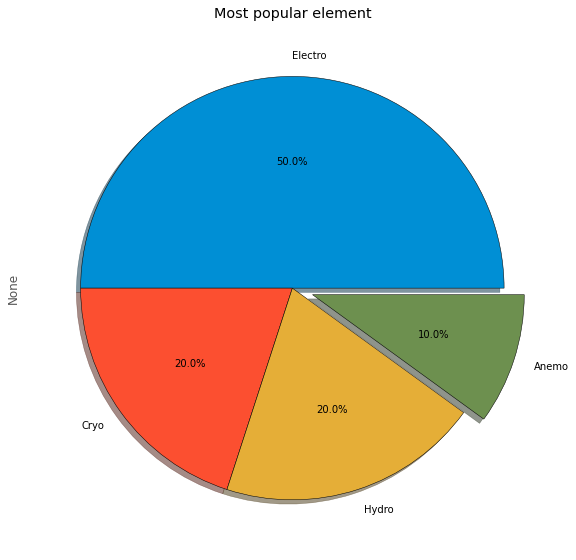

In [62]:
top10 = df_scores.sort_values('f_avg',ascending=False).head(10)
elements = top10.value_counts('Element')
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if elements[element] == elements.min() else 0 for element in elements.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f']

elements.plot.pie(y = elements.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Most popular element")
plt.tight_layout()
plt.show()

In [63]:
print("Most Marriagable:")
for index, element in enumerate(element_m):
    print(" ", str(index+1) + ".", element)

Most Marriagable:
  1. Pyro
  2. Electro
  3. Cryo
  4. Geo
  5. Anemo
  6. Hydro


In [64]:
top10 = df_scores.sort_values('m_avg',ascending=False).head(10)
elements = top10.value_counts('Element')

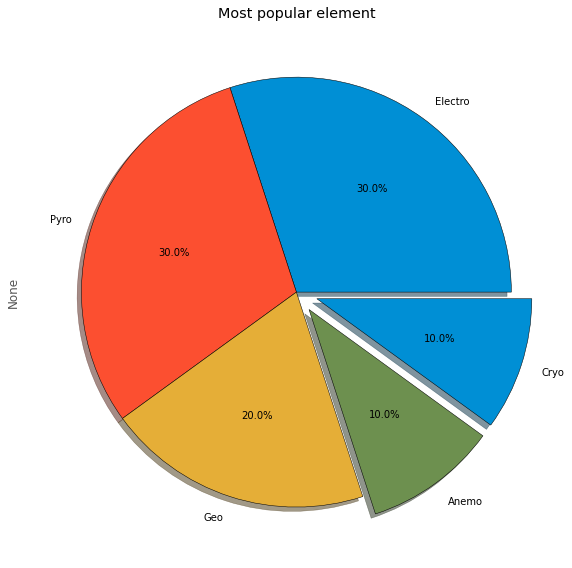

In [65]:
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if elements[element] == elements.min() else 0 for element in elements.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f']

elements.plot.pie(y = elements.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Most popular element")
plt.tight_layout()
plt.show()

In [66]:
print("Most Killable:")
for index, element in enumerate(element_k):
    print(" ", str(index+1) + ".", element)

Most Killable:
  1. Anemo
  2. Hydro
  3. Geo
  4. Cryo
  5. Pyro
  6. Electro


In [67]:
top10 = df_scores.sort_values('k_avg',ascending=False).head(10)
elements = top10.value_counts('Element')

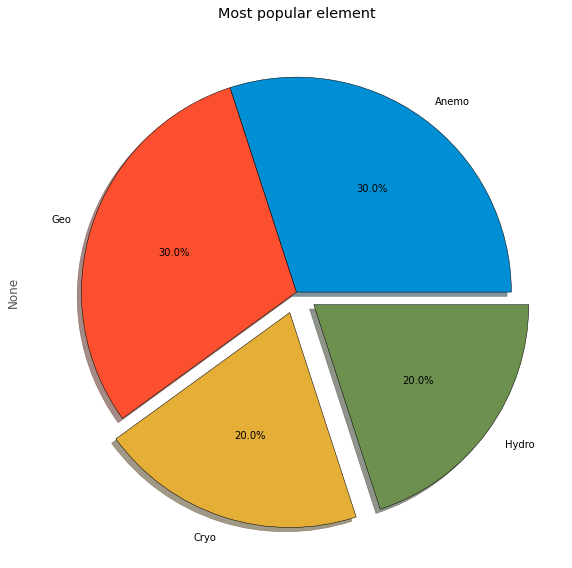

In [68]:
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if elements[element] == elements.min() else 0 for element in elements.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f']

elements.plot.pie(y = elements.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Most popular element")
plt.tight_layout()
plt.show()

In [69]:
for element in df_scores['Element'].unique():
    print(element) 
    print("  Fuckability:" + str(element_f.index(element)+1))
    print("  Marriagiability:" + str(element_m.index(element)+1)) 
    print("  Killability:" + str(element_k.index(element)+1))

Anemo
  Fuckability:6
  Marriagiability:5
  Killability:1
Geo
  Fuckability:4
  Marriagiability:4
  Killability:3
Hydro
  Fuckability:2
  Marriagiability:6
  Killability:2
Electro
  Fuckability:1
  Marriagiability:2
  Killability:6
Cryo
  Fuckability:3
  Marriagiability:3
  Killability:4
Pyro
  Fuckability:5
  Marriagiability:1
  Killability:5


What Weapons ranked highest in each category?

In [70]:
df_scores.groupby('Weapon').f_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Weapon,,,,
Bow,0.298562,0.303991,0.694836,0.000000
Catalyst,0.419797,0.303991,1.302817,0.000000
Claymore,0.338732,0.347418,0.694836,0.130282
Polearm,0.310195,0.173709,0.694836,0.043427
Sword,0.347418,0.347418,0.564554,0.130282


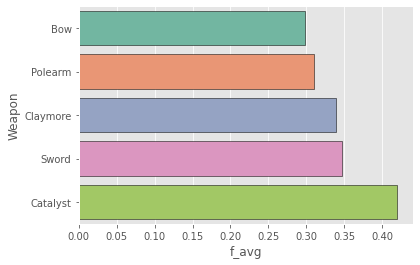

In [71]:
#plot percent tested against borough using seaborn
sns.barplot(x="f_avg", y="Weapon", 
            data=df_scores, orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Weapon').f_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [72]:
df_scores.groupby('Weapon').m_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Weapon,,,,
Bow,0.320276,0.303991,0.781690,0.086854
Catalyst,0.303991,0.347418,0.521127,0.043427
Claymore,0.338732,0.390845,0.477700,0.130282
Polearm,0.328806,0.303991,0.781690,0.043427
Sword,0.385417,0.325704,0.781690,0.173709


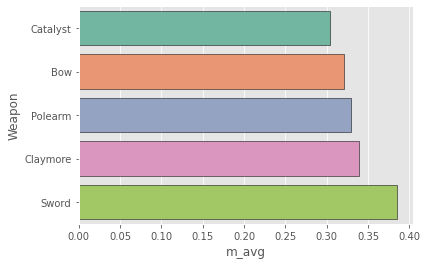

In [73]:
#plot percent tested against borough using seaborn
sns.barplot(x="m_avg", y="Weapon", 
            data=df_scores, orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Weapon').m_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [74]:
df_scores.groupby('Weapon').k_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Weapon,,,,
Bow,0.369131,0.282277,0.955399,0.086854
Catalyst,0.202660,0.217136,0.434272,0.000000
Claymore,0.147653,0.086854,0.390845,0.043427
Polearm,0.477700,0.303991,0.955399,0.217136
Sword,0.369131,0.369131,0.694836,0.086854


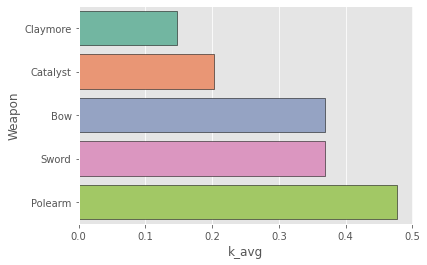

In [75]:
#plot percent tested against borough using seaborn
sns.barplot(x="k_avg", y="Weapon", 
            data=df_scores, orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Weapon').k_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [76]:
#Review
weapon_f = list(df_scores.groupby('Weapon').f_avg.agg(['mean']).sort_values('mean',ascending=False).index)
weapon_m = list(df_scores.groupby('Weapon').m_avg.agg(['mean']).sort_values('mean',ascending=False).index)
weapon_k = list(df_scores.groupby('Weapon').k_avg.agg(['mean']).sort_values('mean',ascending=False).index)

In [77]:

print("Most Fuckable:")
for index, element in enumerate(weapon_f):
    print(" ", str(index+1) + ".", element)

Most Fuckable:
  1. Catalyst
  2. Sword
  3. Claymore
  4. Polearm
  5. Bow


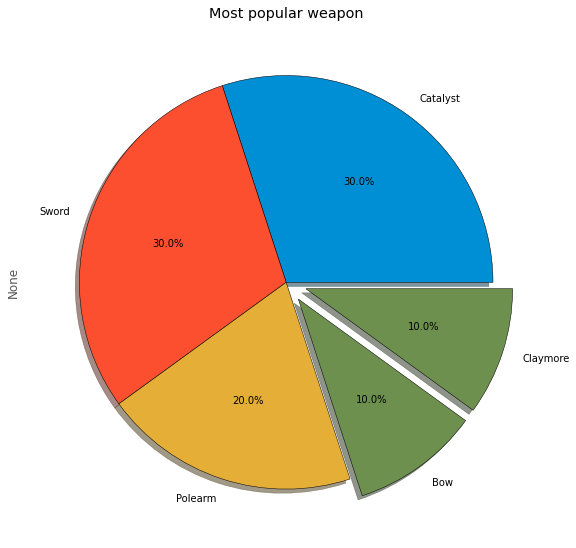

In [78]:
top10 = df_scores.sort_values('f_avg',ascending=False).head(10).value_counts('Weapon')
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if top10[weapon] == top10.min() else 0 for weapon in top10.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f', '#6d904f']


top10.plot.pie(y = top10.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Most popular weapon")
plt.tight_layout()
plt.show()


In [79]:
print("Most Marriagable:")
for index, weapon in enumerate(weapon_m):
    print(" ", str(index+1) + ".", weapon)

Most Marriagable:
  1. Sword
  2. Claymore
  3. Polearm
  4. Bow
  5. Catalyst


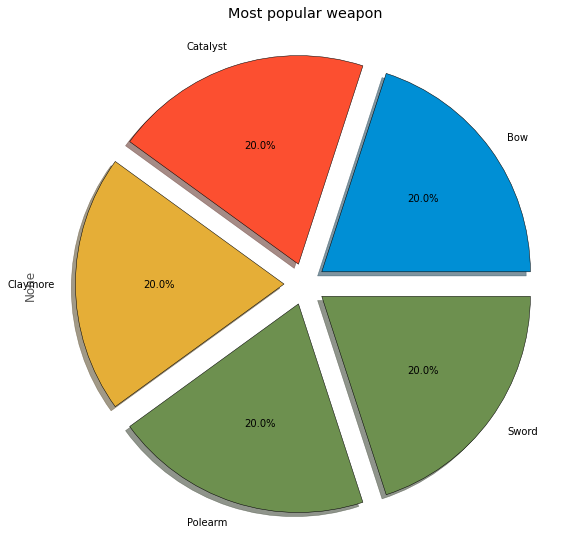

In [80]:
top10 = df_scores.sort_values('m_avg',ascending=False).head(10).value_counts('Weapon')

plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if top10[weapon] == top10.min() else 0 for weapon in top10.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f', '#6d904f']


top10.plot.pie(y = top10.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Most popular weapon")
plt.tight_layout()
plt.show()


In [81]:
print("Most Killable:")
for index, weapon in enumerate(weapon_k):
    print(" ", str(index+1) + ".", weapon)

Most Killable:
  1. Polearm
  2. Bow
  3. Sword
  4. Catalyst
  5. Claymore


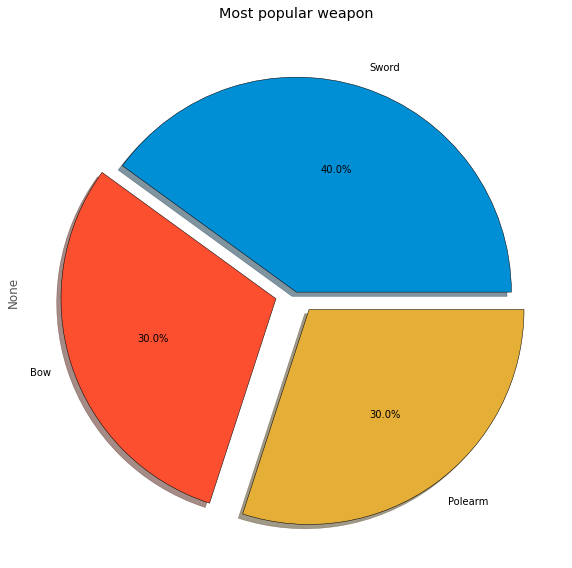

In [82]:
top10 = df_scores.sort_values('k_avg',ascending=False).head(10).value_counts('Weapon')

plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if top10[weapon] == top10.min() else 0 for weapon in top10.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f', '#6d904f']


top10.plot.pie(y = top10.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Most popular weapon")
plt.tight_layout()
plt.show()


In [83]:
for element in df_scores['Weapon'].unique():
    print(element) 
    print("  Fuckability:" + str(weapon_f.index(element)+1))
    print("  Marriagiability:" + str(weapon_m.index(element)+1)) 
    print("  Killability:" + str(weapon_k.index(element)+1))

Catalyst
  Fuckability:1
  Marriagiability:5
  Killability:4
Claymore
  Fuckability:3
  Marriagiability:2
  Killability:5
Bow
  Fuckability:5
  Marriagiability:4
  Killability:2
Sword
  Fuckability:2
  Marriagiability:1
  Killability:3
Polearm
  Fuckability:4
  Marriagiability:3
  Killability:1


How do Regions rank?

In [84]:
df_scores.groupby('Region').f_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Region,,,,
Inazuma,0.334056,0.260563,0.694836,0.000000
Liyue,0.347418,0.303991,0.694836,0.043427
Mondstadt,0.363210,0.390845,1.302817,0.000000
Snezhnaya,0.303991,0.303991,0.303991,0.303991


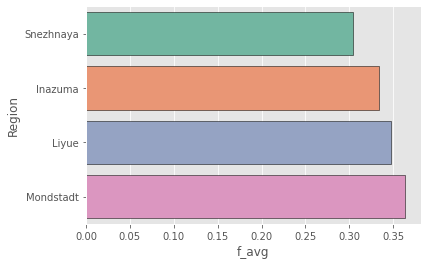

In [85]:
#plot percent tested against borough using seaborn
sns.barplot(x="f_avg", y="Region", 
            data=df_scores, orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Region').f_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [86]:
df_scores.groupby('Region').m_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Region,,,,
Inazuma,0.347418,0.303991,0.781690,0.043427
Liyue,0.347418,0.325704,0.781690,0.043427
Mondstadt,0.327678,0.303991,0.521127,0.130282
Snezhnaya,0.086854,0.086854,0.086854,0.086854


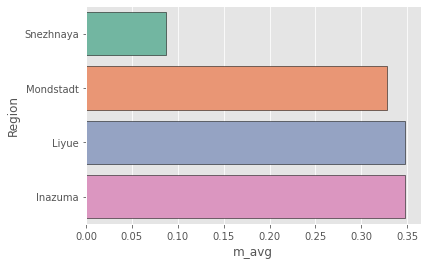

In [87]:
#plot percent tested against borough using seaborn
sns.barplot(x="m_avg", y="Region", 
            data=df_scores, orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Region').m_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [88]:
df_scores.groupby('Region').k_avg.agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Region,,,,
Inazuma,0.300650,0.303991,0.694836,0.000000
Liyue,0.351037,0.238850,0.955399,0.043427
Mondstadt,0.248720,0.217136,0.564554,0.043427
Snezhnaya,0.955399,0.955399,0.955399,0.955399


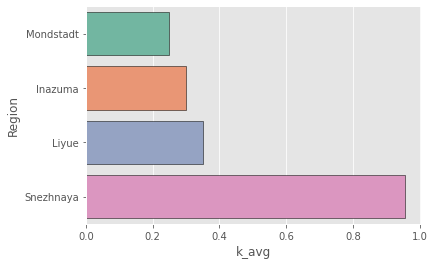

In [89]:
#plot percent tested against borough using seaborn
sns.barplot(x="k_avg", y="Region", 
            data=df_scores, orient = 'h', palette = "Set2", ci = None,
            edgecolor = "black", lw = '0.5', order=df_scores.groupby('Region').k_avg.agg(['mean']).sort_values('mean').index
            )
plt.show()

In [90]:
#Review
region_f = list(df_scores.groupby('Region').f_avg.agg(['mean']).sort_values('mean',ascending=False).index)
region_m = list(df_scores.groupby('Region').m_avg.agg(['mean']).sort_values('mean',ascending=False).index)
region_k = list(df_scores.groupby('Region').k_avg.agg(['mean']).sort_values('mean',ascending=False).index)

In [91]:

print("Most Fuckable:")
for index, element in enumerate(region_f):
    print(" ", str(index+1) + ".", element)

Most Fuckable:
  1. Mondstadt
  2. Liyue
  3. Inazuma
  4. Snezhnaya


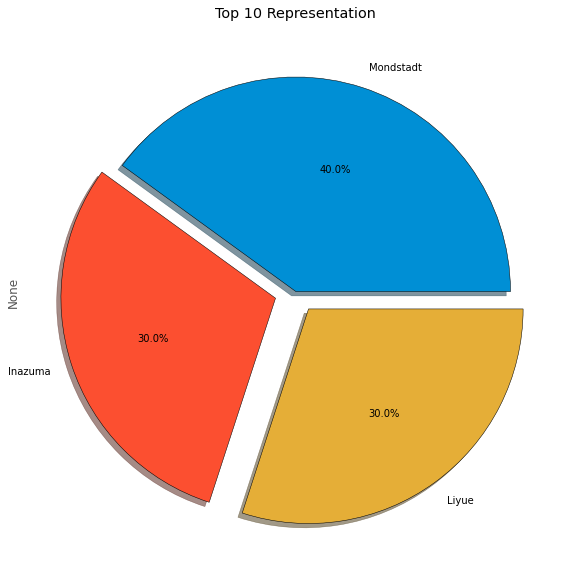

In [92]:
top10 = df_scores.sort_values('f_avg',ascending=False).head(10).value_counts('Region')
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if top10[element] == top10.min() else 0 for element in top10.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f']

top10.plot.pie(y = top10.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Top 10 Representation")
plt.tight_layout()
plt.show()

In [93]:

print("Most Marriagiabe:")
for index, element in enumerate(region_m):
    print(" ", str(index+1) + ".", element)

Most Marriagiabe:
  1. Inazuma
  2. Liyue
  3. Mondstadt
  4. Snezhnaya


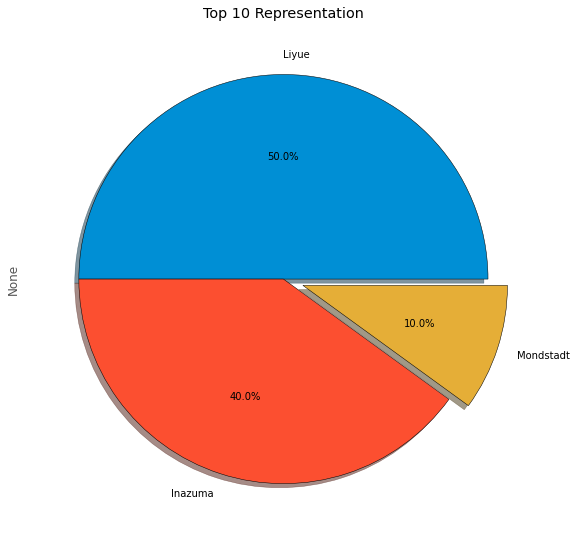

In [94]:
top10 = df_scores.sort_values('m_avg',ascending=False).head(10).value_counts('Region')
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if top10[element] == top10.min() else 0 for element in top10.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f']

top10.plot.pie(y = top10.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Top 10 Representation")
plt.tight_layout()
plt.show()

In [95]:

print("Most Killable:")
for index, element in enumerate(region_k):
    print(" ", str(index+1) + ".", element)

Most Killable:
  1. Snezhnaya
  2. Liyue
  3. Inazuma
  4. Mondstadt


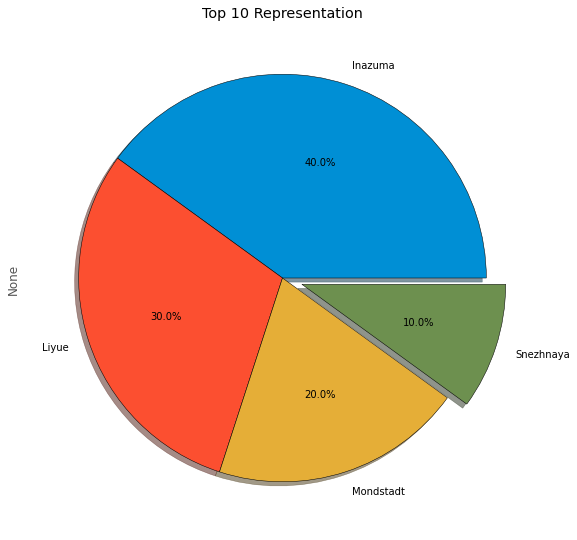

In [96]:
top10 = df_scores.sort_values('k_avg',ascending=False).head(10).value_counts('Region')
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(8,8)


explode = [0.1 if top10[element] == top10.min() else 0 for element in top10.index] 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f']

top10.plot.pie(y = top10.index, colors=colors, explode=explode, shadow=True,
       startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Top 10 Representation")
plt.tight_layout()
plt.show()

Review of All Individual Categories

In [97]:
print("Fuckability:")
for i in range(max(len(df_scores["Region"].unique()),len(df_scores["Weapon"].unique()),len(df_scores["Gender"].unique()), len(df_scores["Weapon"].unique()))):
    print("Top " + str(i) + ": ", "    " if i >= len(gender_f) else gender_f[i], "" if i >= len(element_f) else  element_f[i], "" if i >=  len(weapon_f) else  weapon_f[i], "" if i >= len(region_f) else  region_f[i],)



Fuckability:
Top 0:  Female Electro Catalyst Mondstadt
Top 1:  Male Hydro Sword Liyue
Top 2:       Cryo Claymore Inazuma
Top 3:       Geo Polearm Snezhnaya
Top 4:       Pyro Bow 


In [98]:
print("Marriagiblility:")
for i in range(max(len(df_scores["Region"].unique()),len(df_scores["Weapon"].unique()),len(df_scores["Gender"].unique()), len(df_scores["Weapon"].unique()))):
    print("Top " + str(i+1) + ": ", "    " if i >= len(gender_m) else gender_m[i], "" if i >= len(element_m) else  element_m[i], "" if i >=  len(weapon_m) else  weapon_m[i], "" if i >= len(region_m) else  region_m[i],)



Marriagiblility:
Top 1:  Female Pyro Sword Inazuma
Top 2:  Male Electro Claymore Liyue
Top 3:       Cryo Polearm Mondstadt
Top 4:       Geo Bow Snezhnaya
Top 5:       Anemo Catalyst 


In [99]:
print("Killability:")
for i in range(max(len(df_scores["Region"].unique()),len(df_scores["Weapon"].unique()),len(df_scores["Gender"].unique()), len(df_scores["Weapon"].unique()))):
    print("Top " + str(i+1) + ": ", "    " if i >= len(gender_k) else gender_k[i], "" if i >= len(element_k) else  element_k[i], "" if i >=  len(weapon_k) else  weapon_k[i], "" if i >= len(region_k) else  region_k[i],)


Killability:
Top 1:  Male Anemo Polearm Snezhnaya
Top 2:  Female Hydro Bow Liyue
Top 3:       Geo Sword Inazuma
Top 4:       Cryo Catalyst Mondstadt
Top 5:       Pyro Claymore 


# Classifying 
To confirm some of our observations and assumptions, we can assert that true hit is higher than the mean

In [100]:
class_data = df_scores.copy()
class_data.head()


,Gender,Element,Weapon,Region,f_avg,m_avg,k_avg
0,Male,Anemo,Catalyst,Inazuma,0.000000,0.043427,0.000000
3,Male,Geo,Claymore,Inazuma,0.347418,0.477700,0.043427
19,Female,Hydro,Catalyst,Mondstadt,1.302817,0.347418,0.043427
4,Female,Electro,Claymore,Liyue,0.694836,0.434272,0.043427
34,Female,Hydro,Bow,Liyue,0.694836,0.303991,0.086854


Convert Gender to Dummy Encoding :skull:

In [101]:
gender = list(class_data['Gender'].unique())
gender

['Male', 'Female']

Note the order of the list, this is important for the encoder since the first is set to 1

In [102]:
enc.fit(gender)
class_data['isMale'] = enc.transform(class_data['Gender'])

class_data['isFemale'] = (class_data['isMale']!=1).astype(int)
class_data.drop(['Gender'], axis=1,inplace=True)
class_data.head()


,Element,Weapon,Region,f_avg,m_avg,k_avg,isMale,isFemale
0,Anemo,Catalyst,Inazuma,0.000000,0.043427,0.000000,1,0
3,Geo,Claymore,Inazuma,0.347418,0.477700,0.043427,1,0
19,Hydro,Catalyst,Mondstadt,1.302817,0.347418,0.043427,0,1
4,Electro,Claymore,Liyue,0.694836,0.434272,0.043427,0,1
34,Hydro,Bow,Liyue,0.694836,0.303991,0.086854,0,1


In [103]:
for value in class_data['Element'].unique():
    class_data['is' + str(value)] = (class_data['Element'] == value).astype(int)

class_data.drop(['Element'], axis=1,inplace=True)
class_data.head()


,Weapon,Region,f_avg,m_avg,k_avg,isMale,isFemale,isAnemo,isGeo,isHydro,isElectro,isCryo,isPyro
0,Catalyst,Inazuma,0.000000,0.043427,0.000000,1,0,1,0,0,0,0,0
3,Claymore,Inazuma,0.347418,0.477700,0.043427,1,0,0,1,0,0,0,0
19,Catalyst,Mondstadt,1.302817,0.347418,0.043427,0,1,0,0,1,0,0,0
4,Claymore,Liyue,0.694836,0.434272,0.043427,0,1,0,0,0,1,0,0
34,Bow,Liyue,0.694836,0.303991,0.086854,0,1,0,0,1,0,0,0


In [104]:
for value in class_data['Weapon'].unique():
    class_data['is' + str(value)] = (class_data['Weapon'] == value).astype(int)

class_data.drop(['Weapon'], axis=1,inplace=True)
class_data.head()



,Region,f_avg,m_avg,k_avg,isMale,isFemale,isAnemo,isGeo,isHydro,isElectro,isCryo,isPyro,isCatalyst,isClaymore,isBow,isSword,isPolearm
0,Inazuma,0.000000,0.043427,0.000000,1,0,1,0,0,0,0,0,1,0,0,0,0
3,Inazuma,0.347418,0.477700,0.043427,1,0,0,1,0,0,0,0,0,1,0,0,0
19,Mondstadt,1.302817,0.347418,0.043427,0,1,0,0,1,0,0,0,1,0,0,0,0
4,Liyue,0.694836,0.434272,0.043427,0,1,0,0,0,1,0,0,0,1,0,0,0
34,Liyue,0.694836,0.303991,0.086854,0,1,0,0,1,0,0,0,0,0,1,0,0


In [105]:
for value in class_data['Region'].unique():
    class_data['is' + str(value)] = (class_data['Region'] == value).astype(int)

class_data.drop(['Region'], axis=1,inplace=True)
class_data.head()


,f_avg,m_avg,k_avg,isMale,isFemale,isAnemo,isGeo,isHydro,isElectro,isCryo,isPyro,isCatalyst,isClaymore,isBow,isSword,isPolearm,isInazuma,isMondstadt,isLiyue,isSnezhnaya
0,0.000000,0.043427,0.000000,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0.347418,0.477700,0.043427,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
19,1.302817,0.347418,0.043427,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,0.694836,0.434272,0.043427,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
34,0.694836,0.303991,0.086854,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


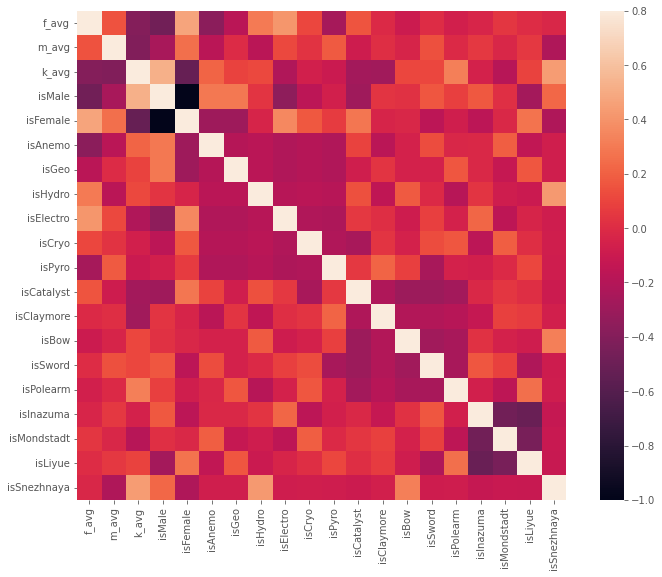

In [106]:
corrmat = class_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [107]:
sns.diverging_palette(20, 220, n=256)

[(0.7634747047461135, 0.3348456555528834, 0.225892295531744),
 (0.7649441118665306, 0.3396246444984717, 0.23152090062227623),
 (0.7664135189869477, 0.3444036334440599, 0.23714950571280843),
 (0.7678829261073647, 0.34918262238964815, 0.2427781108033407),
 (0.769352333227782, 0.35396161133523635, 0.2484067158938729),
 (0.7708217403481991, 0.3587406002808246, 0.2540353209844051),
 (0.7722911474686162, 0.3635195892264128, 0.2596639260749373),
 (0.7737605545890333, 0.36829857817200107, 0.2652925311654695),
 (0.7752299617094505, 0.37307756711758927, 0.2709211362560018),
 (0.7766993688298676, 0.37785655606317753, 0.276549741346534),
 (0.7781687759502847, 0.38263554500876573, 0.28217834643706624),
 (0.7796381830707018, 0.387414533954354, 0.2878069515275984),
 (0.7811075901911189, 0.3921935228999422, 0.29343555661813064),
 (0.7825769973115361, 0.39697251184553045, 0.2990641617086629),
 (0.7840464044319531, 0.40175150079111865, 0.3046927667991951),
 (0.7855158115523703, 0.4065304897367069, 0.3103213718897273),
 (0.7869852186727874, 0.41130947868229517, 0.3159499769802595),
 (0.7884546257932045, 0.4160884676278834, 0.32157858207079176),
 (0.7899240329136216, 0.4208674565734716, 0.327207187161324),
 (0.7913934400340388, 0.42564644551905984, 0.33283579225185617),
 (0.7928628471544559, 0.4304254344646481, 0.3384643973423884),
 (0.7943322542748729, 0.4352044234102363, 0.3440930024329206),
 (0.7958016613952901, 0.4399834123558245, 0.3497216075234529),
 (0.7972710685157072, 0.44476240130141276, 0.3553502126139851),
 (0.7987404756361244, 0.449541390247001, 0.3609788177045173),
 (0.8002098827565414, 0.4543203791925892, 0.3666074227950495),
 (0.8016792898769586, 0.4590993681381774, 0.37223602788558174),
 (0.8031486969973757, 0.4638783570837657, 0.377864632976114),
 (0.8046181041177929, 0.46865734602935394, 0.3834932380666462),
 (0.8060875112382099, 0.47343633497494214, 0.3891218431571784),
 (0.8075569183586271, 0.47821532392053034, 0.3947504482477106),
 (0.8090263254790442, 0.4829943128661186, 0.40037905333824286),
 (0.8104957325994613, 0.4877733018117068, 0.40600765842877506),
 (0.8119651397198784, 0.492552290757295, 0.4116362635193072),
 (0.8134345468402955, 0.49733127970288327, 0.4172648686098395),
 (0.8149039539607127, 0.5021102686484715, 0.4228934737003717),
 (0.8163733610811298, 0.5068892575940598, 0.4285220787909039),
 (0.8178427682015469, 0.5116682465396479, 0.4341506838814361),
 (0.819312175321964, 0.5164472354852363, 0.4397792889719684),
 (0.8207815824423812, 0.5212262244308246, 0.44540789406250064),
 (0.8222509895627982, 0.5260052133764127, 0.4510364991530328),
 (0.8237203966832153, 0.5307842023220009, 0.456665104243565),
 (0.8251898038036325, 0.5355631912675891, 0.4622937093340973),
 (0.8266592109240496, 0.5403421802131774, 0.4679223144246295),
 (0.8281286180444667, 0.5451211691587656, 0.47355091951516165),
 (0.8295980251648838, 0.5499001581043538, 0.4791795246056939),
 (0.831067432285301, 0.5546791470499421, 0.48480812969622616),
 (0.8325368394057181, 0.5594581359955303, 0.4904367347867584),
 (0.8340062465261352, 0.5642371249411186, 0.49606533987729057),
 (0.8354756536465523, 0.5690161138867067, 0.5016939449678227),
 (0.8369450607669694, 0.573795102832295, 0.507322550058355),
 (0.8384144678873866, 0.5785740917778832, 0.5129511551488872),
 (0.8398838750078037, 0.5833530807234715, 0.5185797602394195),
 (0.8413532821282208, 0.5881320696690596, 0.5242083653299516),
 (0.8428226892486379, 0.592911058614648, 0.5298369704204839),
 (0.844292096369055, 0.5976900475602362, 0.5354655755110161),
 (0.8457615034894721, 0.6024690365058244, 0.5410941806015483),
 (0.8472309106098893, 0.6072480254514125, 0.5467227856920805),
 (0.8487003177303064, 0.6120270143970008, 0.5523513907826128),
 (0.8501697248507235, 0.6168060033425891, 0.5579799958731451),
 (0.8516391319711406, 0.6215849922881773, 0.5636086009636773),
 (0.8531085390915577, 0.6263639812337655, 0.5692372060542094),
 (0.8545779462119749, 0.6311429701793538, 0.5748658111447417),
 (0.85622815928666

In [108]:
n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(20, 220, n=256)
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

Index(['index', 'variable', 'value'], dtype='object')


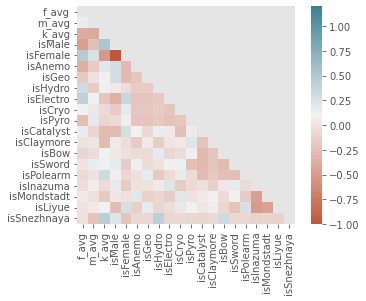

In [109]:
mask = np.triu(np.ones_like(corrmat))
correlationSize = pd.melt(corrmat.reset_index(), id_vars='index')
print(correlationSize.columns)

sns.heatmap(corrmat, vmax=1.2, square=True,mask=mask,cmap=palette);


In [110]:
#https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [111]:
print("Top Correlations")
print(get_top_abs_correlations(class_data, 10))

Top Correlations
k_avg     isMale         0.524937
f_avg     isFemale       0.476211
k_avg     isSnezhnaya    0.440143
isHydro   isSnezhnaya    0.421637
f_avg     isElectro      0.406712
isFemale  isElectro      0.355512
k_avg     isPolearm      0.317737
isBow     isSnezhnaya    0.317324
f_avg     isHydro        0.297872
isMale    isAnemo        0.290579
dtype: float64


In [121]:
au_corr = class_data.corr().unstack()
labels_to_drop = get_redundant_pairs(class_data)

au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)

Text(0.5, 1.0, "'Friendability' Correlation")

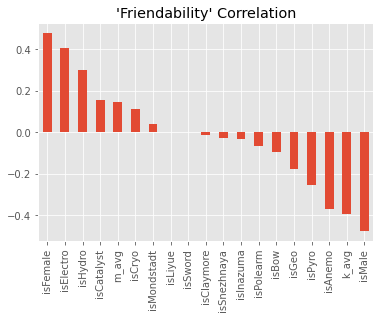

In [113]:
au_corr['f_avg'].plot.bar().set_title("'Friendability' Correlation")

Text(0.5, 1.0, 'Marriage Correlation')

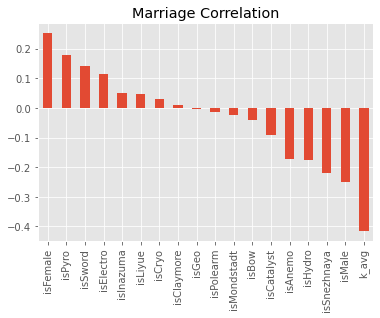

In [114]:
au_corr['m_avg'].plot.bar().set_title("Marriage Correlation")

Text(0.5, 1.0, 'Killability Correlation')

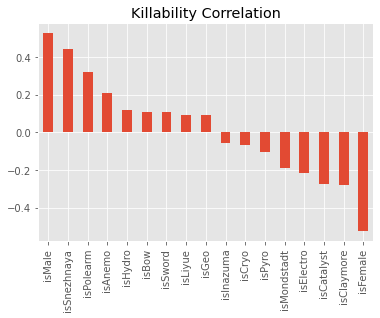

In [115]:
au_corr['k_avg'].plot.bar().set_title('Killability Correlation')

Text(0.5, 1.0, 'Electro Correlation')

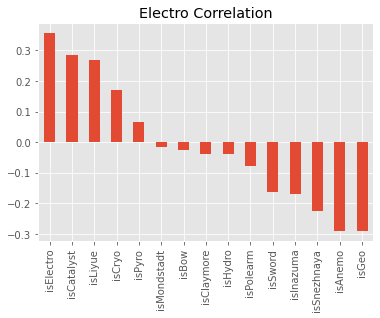

In [123]:
au_corr['isFemale'].plot.bar().set_title('Female Correlation')

In [117]:
f_data = class_data.drop(['m_avg','k_avg'], axis=1)
m_data = class_data.drop(['f_avg','k_avg'], axis=1)
k_data = class_data.drop(['f_avg','m_avg'], axis=1)

f_data.head()

,f_avg,isMale,isFemale,isAnemo,isGeo,isHydro,isElectro,isCryo,isPyro,isCatalyst,isClaymore,isBow,isSword,isPolearm,isInazuma,isMondstadt,isLiyue,isSnezhnaya
0,0.000000,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0.347418,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
19,1.302817,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,0.694836,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
34,0.694836,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [118]:
#Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)

In [119]:
Xf = f_data.drop("f_avg",axis=1)
Yf = f_data['f_avg']
X_train, X_test, Y_train, Y_test = train_test_split(Xf, Yf, test_size = 0.30)

X_train.shape, Y_train.shape, X_test.shape

((25, 17), (25,), (12, 17))

In [120]:
#random_forest.fit(X_train, Y_train)
#Y_pred = random_forest.predict(X_test)
#acc_log = round(random_forest.score(X_train, Y_train) * 100, 2)
#acc_log